# 확률적 경사 하강법

- 훈련데이터가 한번에 준비되지 않고 조금씩 준비되는 것의 문제
    - 새로운 생선이 끊임없이 추가되지만 생선의 정보를 계속 업데이트하고 계속 훈련을 할 수는 없다
    - 끊임없이 데이터를 추가하고 매일 학습
        - 서버 용량 문제, 학습 시간 문제
    - 이전 데이터를 버리고 학습 데이터의 크기를 고정시키는 방법
        - 버려지는 데이터에 대한 데이터 손실 문제
- 목표 : 
    - 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방법 찾기
    - 점진적 학습 또는 온라인 학습이라고 함
    - 대표적인 점진적학습 알고리즘
        - 확률적경사하강법

## 확률적 경사 하강법
- 확률적
    - 무작위하게 또는 랜덤하게와 같은 표현
- 경사
    - 언덕 경사
    - 기울기
- 하강법
    - 내려가는 방법
- 랜덤하게 경사를 따라 내려가는 방법
- 산을 빨리 내려가려면
    - 가장 가파른 경사를 따라 원하는 지점에 도달하기
    - 한 걸음이 너무 크면 경사를 따라 내려오지 못하고 올라갈 수도 있다
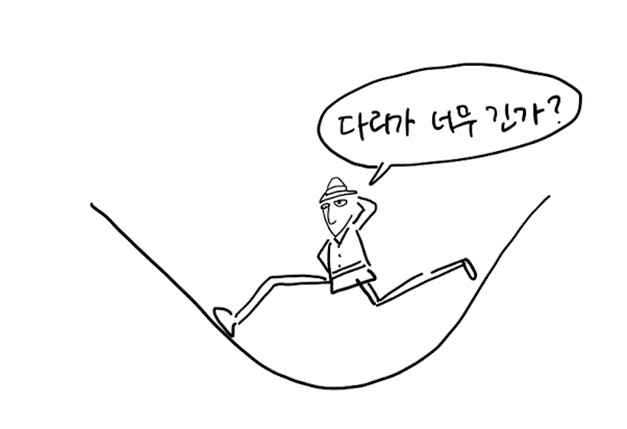

- 경사하강법
    - 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는것이 중요
    - 조금씩 내려오는 과정이 경사하강법모델을 훈련하는 것

- **확률적**
- 경사하강법으로 내려올 때 가장 가파른 길을 찾는 방법
    - 훈련세트이 전체 세트를 사용하지 않고
        - 딱 하나의 샘플을 훈련세트에서 랜덤하게 골라 가장 가파른 길을 찾는다.
- 훈련세트에서 하나의 샘플을 고르는 것이 **확률적경사하강법**
    - 훈련세트에서 하나의 샘플을 골라 경사를 조금 내려감
        - 그 다음 훈련세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려감
        - 이런식으로 모든 훈련세트를 다 사용할때까지 계속
        - 훈련세트를 다 사용했지만 최저점에 도달하지 못했다면
            - 모든 훈련세트를 다시 복구시키고
                - 처음부터 다시 시작
                    - 만족할만한 지점에 도달할때까지 계속 반복
            - 이런 한번의 반복을 **에포크**라고 함
                - 수십 수백번의 에포크를 수행
                
                
### 다른 형태의 경사하강법                
- 훈련세트에서 여러개의 샘플을 사용해 경사를 찾는 **미니배치경사하강법**
- 극단적으로 한 번에 선택한 경사로를 따라 내려가기 위해 모든 데이터를 사용해 경사를 찾는 **배치경사하강법**
    - 단, 전체 데이터를 사용하면 그만큼 자원을 많이 사용하게 되고
    - 어떤 경우는 데이터가 너무 많아 전체 데이터를 읽을 수 없을수 있음
        - 즉, 거의 사용되지 않음

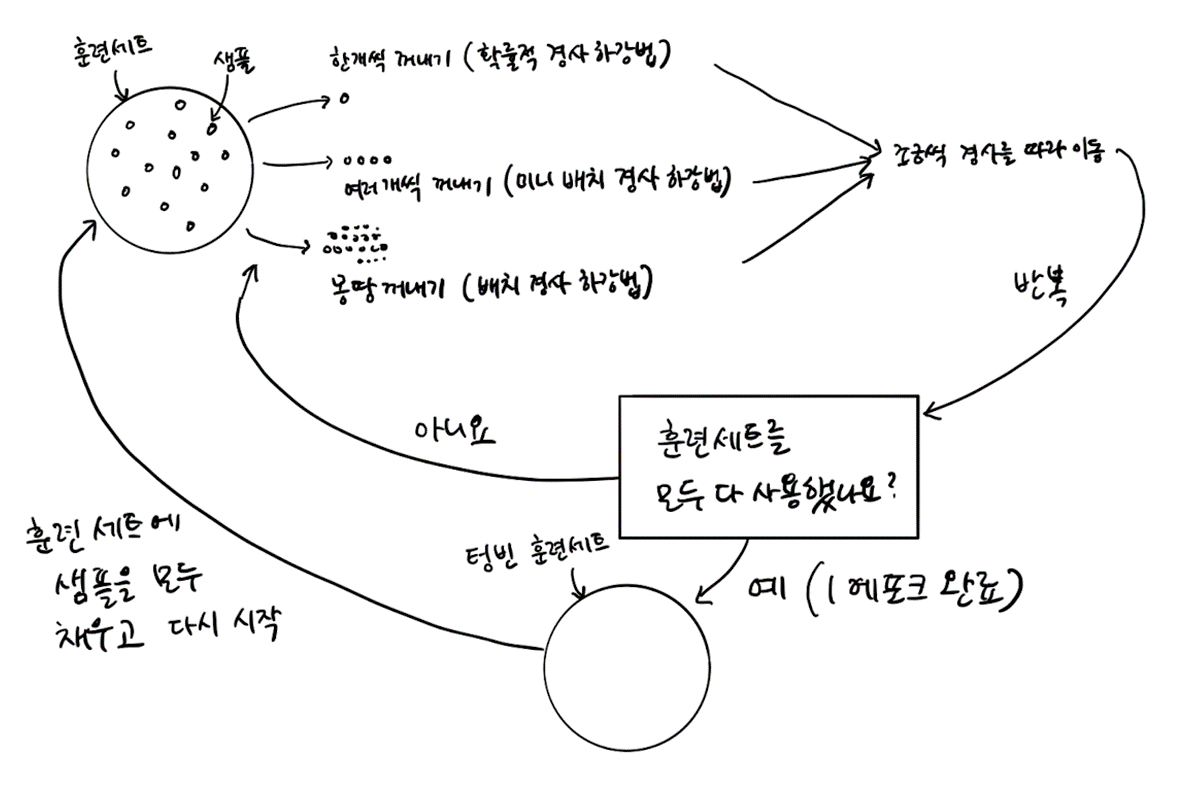

### 손실함수
#### 어디를 내려가야 하는가?
- 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 값
    - 값이 클수록 엉터리라는 의미이므로 값이 작을수록 성능이 좋은 알고리즘이다
        - but, 어디가 최솟값인지는 알지 못함
        - 가능한 많이 찾아보고 만족할만한 수준이면 산을 다 내려왔다고 인정해야 함
    - 작은 값을 찾기위해 조금씩 이동하려면 확률적 경사하강법을 써야 함
- 다뤄야 하는 많은 문제의 손실함수는 이미 정해져 있음
    - 해당 러닝 알고리즘으로 풀어야할 문제의 종류에 맞는 손실함수가 정해져 있다는 뜻

- tip. 손실함수 vs 비용함수
    - 손실함수 : 샘플 하나에 대한 손실을 정의
    - 비용함수 : 모든 샘플에 대한 손실함수의 합
    - 보통 이 둘을 비슷한 의미로 사용함(엄격하게 구분하지 않음)

### 분류에서의 손실
- 정답을 못 맞히는 것
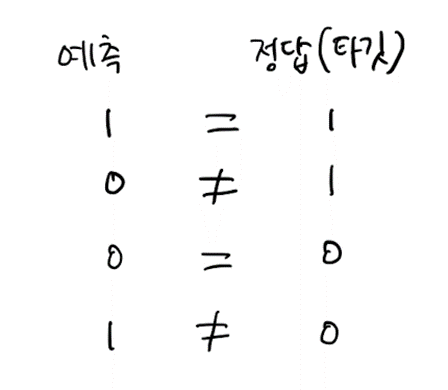
- 정확도는???
    - 4개의 예측 중 2개를 맞췄으므로 0.5
    - 정확도를 손실함수로 사용한다면
        - 정확도에 역수를 구한 후 음수를 취해 -1.0이 가장 낮고 -0.0이 가장 높다고 한다면???
        - 정확도는 손실함수로 사용할 수 없는 단점이 있음
            - 그림과 같이 4개의 샘플만 있다면 가능한 정확도는
                - 0,0.25,04,0.75,1 다섯가지 뿐임
                - 정확도가 듬성듬성 하다면 경사하강법을 이용할 수 없음
            - 손실함수를 위한 경사는 확실히 연속적이어야 함(미분 가능해야 함)
            
            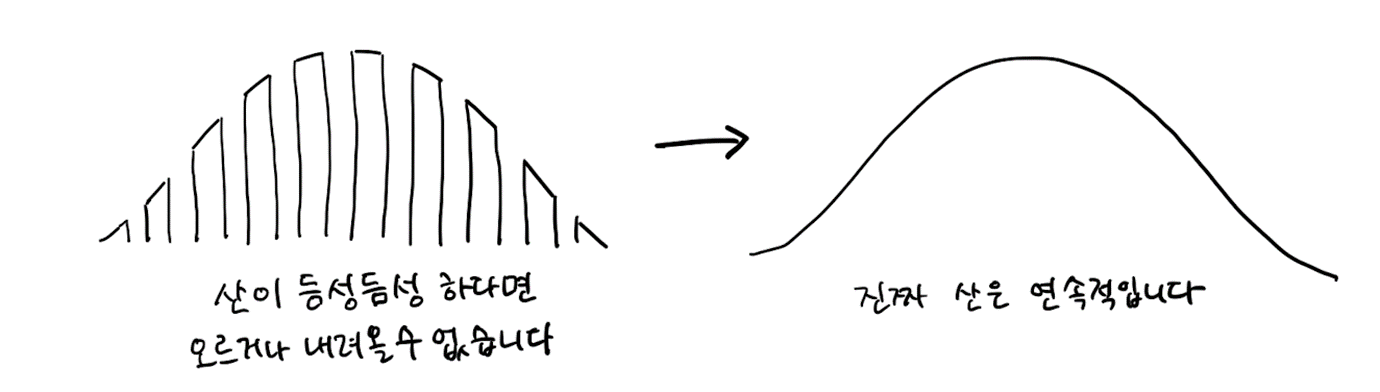

### 연속 적인 손실함수
- 로지스틱 회귀모델은 확률을 출력함
    - 예측은 0또는 1이지만 확률은 0~1사이의 어떤 값도 될 수 있음. 즉, 연속적임
    - 확률을 이용 연속적인 손실값 계산
        - 예측 확률 X 정답(타깃) 1 -> 음수처리 -> 손실값
            - 예측이 1에 가까울수록 좋은 모델, 예측확률이 1에 가까울수록 타깃곱의 음수는 점점 작아짐
    - 위 샘플 4개의 예측 확률을 각각 0.9, 0.3,0.2,0.8 이라고 가정한다면???
        - 첫번째 샘플 손실함수
            - 예측 0.9 X 정답(타깃) 1 -> 음수처리 -> -0.9
        - 손실값이 더 작으면 더 좋은 모델
            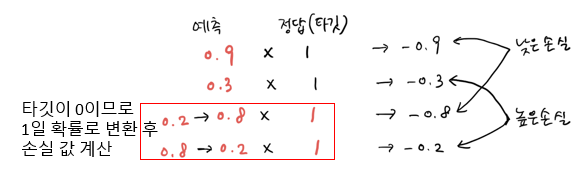
        - 이와 같은 방법으로 연속적인 손실값을 얻는다.
    - 예측 확률에 로그 함수를 적용하면 더 효율적인 손실값을 얻을 수 있다.
    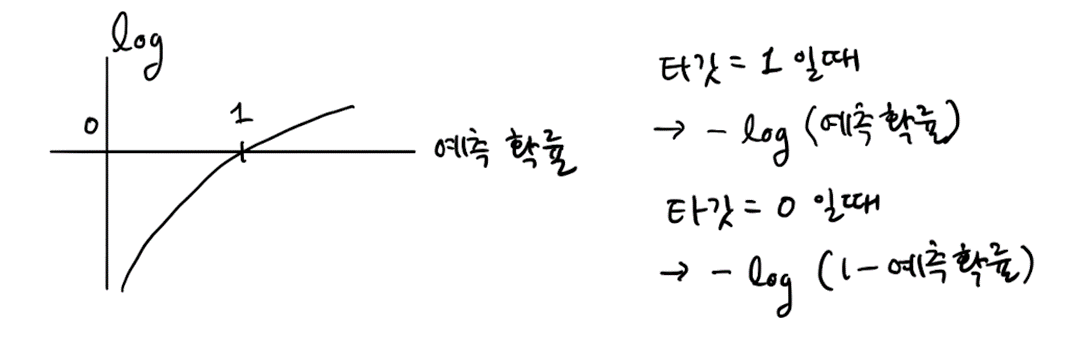
    - 예측 확률의 범위는 0~1사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실값은 양수가 됨
        - 손실값이 양수가 되면 이해하기가 더 쉽다
        - 로그함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있음

In [1]:
import numpy as np
# 예측 확률 0.9일때 손실값(손실이 낮음)
-(np.log(0.9)*1)

0.10536051565782628

In [2]:
# 예측확률 0.2일때 손실값(손실이 높음)
-(np.log(0.2)*1)

1.6094379124341003

- **위에서 정의한 손실함수를 이진크로스엔트로피 손실함수 또는 로지스틱손실함수라고 부른다**
- 다중 분류도 거의 비슷하게 만든다
    - **다중 분류는 크로스엔트로피손실함수를 사용한다**
    - 손실함수는 이미 개발되어 있기 때문에 모델 사용시 지정을 해주면 됨
- 중요사항. 
    - **이진분류 : 이진크로스엔트로피 손실함수**
    - **다중분류 : 크로스엔트로피 손실함수**

## SGDClassifier
- 확률적 경사하강법을 사용한 선형분류 알고리즘

In [3]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [5]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input) #훈련셋트의 통곗값 으로
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)#테스트 세트를 변환

In [8]:
from sklearn.linear_model import SGDClassifier

In [9]:
# 다중 분류 문제
# loss='log' : 로지스틱손실함수
sg = SGDClassifier(loss='log',max_iter=10,random_state=42)
sg.fit(train_scaled, train_target)
print(sg.score(train_scaled, train_target))
print(sg.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


- ConvergenceWarning: Maximum number of iteration
    - 학습을 위한 반복 횟수가 충분하지 않다는 의미
    - max_iter를 늘려야 함
- 과소적합

### 모델에 이어서 훈련할 때는 partial_fit()  사용
- 호출할때마다 1에포크씩 이어서 훈련함

In [10]:
sg.partial_fit(train_scaled, train_target)

print(sg.score(train_scaled, train_target))
print(sg.score(test_scaled, test_target))

0.8151260504201681
0.85


- 에포크를 한번 더 실행하니 정확도가 향상되었음
    - 모델을 여러 에포크에서 더 훈련해 볼 필요가 있어보임
    - 얼마나 훈련해야 할까??????

- tip.SGDClassifier는 기본 확률적 경사하강법을 사용함
    - 한번에 하나의 샘플을 이용
    - 미니배치나 배치는 지원하지 않음

## 에포크와 과대/과소적합
- 확률적 경사하강법을 사용한 모델은 에포크횟수에 따라 과소적합이나 과대적합이 될 수 있음
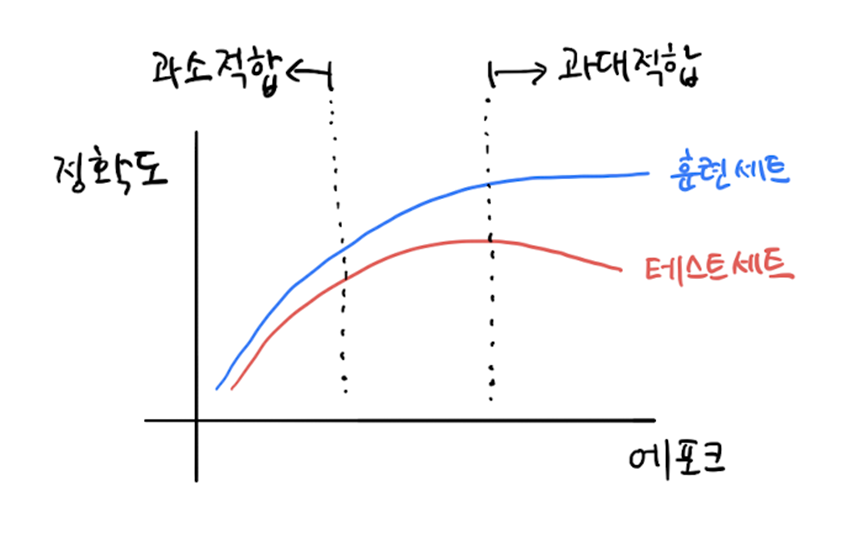
- 과소적합이 발생하는 에포크 이상으로 충분히 학습하되 과대적합이 되기전에 종료 해야 함
    - 조기종료 : 과대 적합이 시작되기 전에 학습을 멈추는 것

- partial_fit() 이용 1번의 에포크마다 결과를 확인
    - 주의. partial_fit(classes=) 은 결정레이블을 classes 파라미터로 전달해야 함

In [11]:
import numpy as np
sc = SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

In [12]:
for _ in range(0,300) :# 300번 에포크 진행(한번 진행할때마다 훈련/테스트 점수 저장)
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


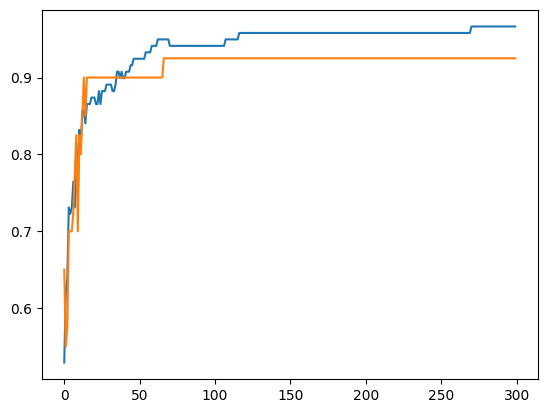

In [13]:
# 훈련점수와 테스트점수를 에포크별로 시각화
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

- 데이터가 작아서 확연히 보이지는 않지만 100번 에포크 이후 훈련점수와 테스트 점수가 차이가 생김
    - 에포크수(max_iter)를 100으로 변경
    - tol = None으로 지정해서 자동으로 멈추지 않고 100번까지 무조건 학습하도록 함

In [14]:
sc = SGDClassifier(loss='log',max_iter=100,random_state=42,tol=None)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


- 학습점수와 테스트 점수가 전체적으로 향상됨
- tip.확률적 경사 하강법을 사용하는 회귀모델
    - SGDRegressor

### SGDClassifier의 기본 loss 함수 : hinge
   - hinge는 서포트벡터머신 알고리즘을 위한 손실함수 임

In [15]:
sc = SGDClassifier(loss='hinge',max_iter=100,random_state=42,tol=None)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


- 결과는 비슷하게 나옴